In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [2]:
churn = pd.read_csv('data/churn.csv', sep = ',')
display(churn)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# заменяем в столбцах значения 0 и 1 (False и True) для упрощения восприятия и построения графиков
churn['Exited'] = churn['Exited'].apply(lambda x:'Ушедший' if x == 1 else 'Лояльный')  
churn['IsActiveMember'] = churn['IsActiveMember'].apply(lambda x: 'Активный' if x == 1 else 'Неактивный')   
display(churn)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,Активный,101348.88,Ушедший
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Активный,112542.58,Лояльный
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,Неактивный,113931.57,Ушедший
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,Неактивный,93826.63,Лояльный
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Активный,79084.10,Лояльный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,Неактивный,96270.64,Лояльный
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,Активный,101699.77,Лояльный
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,Активный,42085.58,Ушедший
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,Неактивный,92888.52,Ушедший


## Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

## 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [4]:
#Через количество клиентов, относящихся к каждой группе, найдем их соотношение
ratio_exited = round(churn['Exited'].value_counts()[0]/churn['Exited'].value_counts()[1],1)
display('Соотношение количества лояльных клиентов к ушедшим состваляет {} к 1'.format(ratio_exited))

'Соотношение количества лояльных клиентов к ушедшим состваляет 3.9 к 1'

Cоотношение лояльных клиентов к ушедшим составляет почти 4 к 1. На мой взгляд, важно узнать, за какой период банк покинуло большее количество клиентов. Если мы увидим, нарастающий отток в короткий период времени, необходимо проанализировать изменения политики банка в отношении клиентов, вписывающиеся в соответствующие временные рамки. Однако, можно представить ситуацию, когда данные представлены за длительную историю существования банка, и уходящие клиенты в совокупности являются не проблемой, а частью естественного притока и оттока потребителей. 

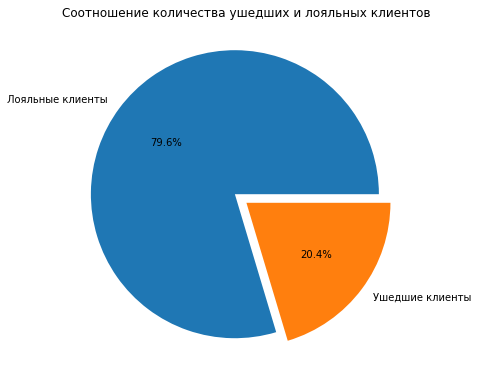

In [5]:
ratio = churn['Exited'].value_counts() # Формируем две группы (ушедшие и лояльные) по количеству клиентов. 
fig1 = plt.figure(figsize=(5, 5))      
axes = fig1.add_axes([0, 0, 1, 1])
axes.pie(                       # Выбираем круговую диаграмму, так как на ней удобно показывать группы, входящие в состав целого
    ratio,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'], # обозначаем названия групп
    autopct='%.1f%%',
    explode = [0.1, 0],
);
axes.set_title('Соотношение количества ушедших и лояльных клиентов'); # название диаграммы

На диаграмме отчетливо видно, что около четверти потребителей перестала быть клиентами банка.

## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
Опишите распределение и сделайте выводы.

In [6]:
balance_column = churn.Balance # выделим столбец Balance и клпируем его в Series
balance = pd.Series(balance_column)
balance1 = balance[balance > 2500].sort_values() # отсечем все показатели меньше 2500 и отсортируем список
display(balance1) # из вывода видно, что наименьшее число 3768, и список идет на возрастание 

8427      3768.69
5686     12459.19
1791     14262.80
5048     16893.59
6029     23503.31
          ...    
6717    216109.88
3588    221532.80
8733    222267.63
3280    238387.56
2092    250898.09
Name: Balance, Length: 6383, dtype: float64

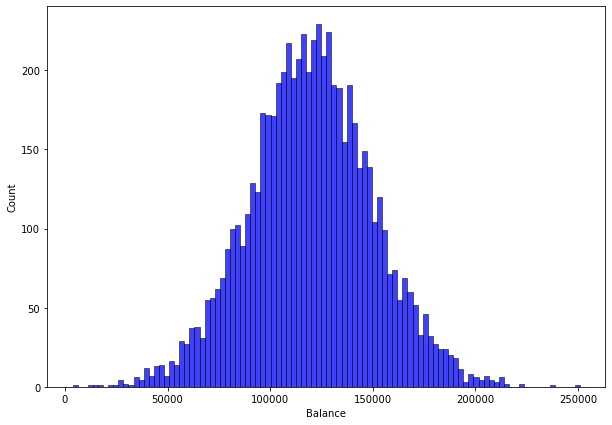

In [7]:
fig = plt.figure(figsize=(10, 7)) # для визуализации распределения выберем гистограмму
hist1 = sns.histplot(
    x=balance1,
    bins=100,
    color = 'blue'# разделим имеющиеся данные на 100 групп, чтобы получить более точную картину
);

На гистограмме видим нормальное распределение. Чаще всего на счетах клиентов находятся суммы от 10 до 15 тысяч доларов. Справа на гистограмме видно несколько счетов с наличием на них сумм, превышающих 23 тысячи доларов. Возможно, их стоит проверить на предмет выбросов. В целом, диапазон сумм варьируется от 3 до 25 тысяч.

## 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [8]:
#создаем маску, чтобы построить распределение баланса по лояльным клиентом
balance_exited1 = churn[churn['Exited'] == 'Ушедший']['Balance'] 
#создаем маску, чтобы построить распределение баланса по ушедшим клиентом
balance_exited2 = churn[churn['Exited'] == 'Лояльный']['Balance']

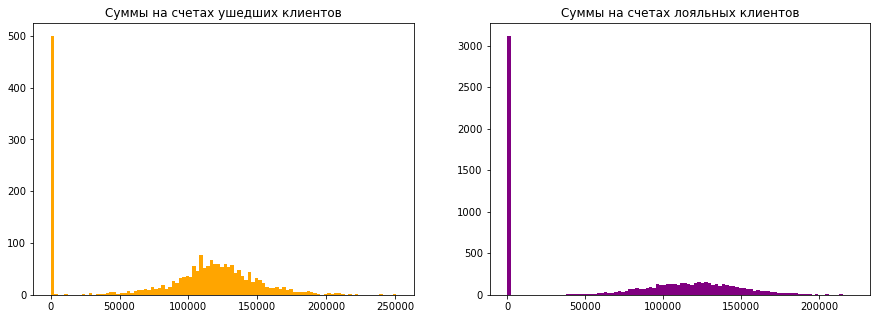

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # для визуализации распределения выберем гистограмму
axes[0].hist(
    x= balance_exited1, label=["Баланс на счетах ушедших клиентов"], color="orange", bins=100
)
axes[0].set_title("Суммы на счетах ушедших клиентов"); 

axes[1].hist(
    x=balance_exited2, label=["Баланс на счетах лояльных клиентов"], color="purple", bins=100
)
axes[1].set_title("Суммы на счетах лояльных клиентов");


На обеих гистограммах видны выбросы в областях, близких к нулю, скорее всего это большое количество клиентов, которые не пользуются счетом (нулевой баланс) или просто держащие на счету небольшую сумму денег. Можно предположить, что банк интересуют более состоятельные клиенты, поэтому, рассматривая выборку, значениями, составляющие выброс, можно пренебречь. Также видно, что выборка лояльных клиентов распределена по графику более однородно и не имеет выраженного пика. На гистограмме ушедших клиентов отчетливо видно увеличение количества клиентов с суммой 10-15 тысяч доларов на счету, также среди ушедших клиентов явно больше тех, кто имеет на счету более 15 тысяч долларов. Как и на гистограмме из предыдущего задания, видны несколько случаев с суммой, приближающейся к 25000, в будущем стоит определить, относить эти случаи к выбросам или нет. 

## 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [10]:
age1 = churn[churn.Exited == 'Ушедший']['Age'] # создаем маску, чтобы построить распределение лояльных клиентов по возрасту
age0 = churn[churn.Exited == 'Лояльный']['Age'] # создаем маску, чтобы построить распределение ушедших клиентов по возрасту

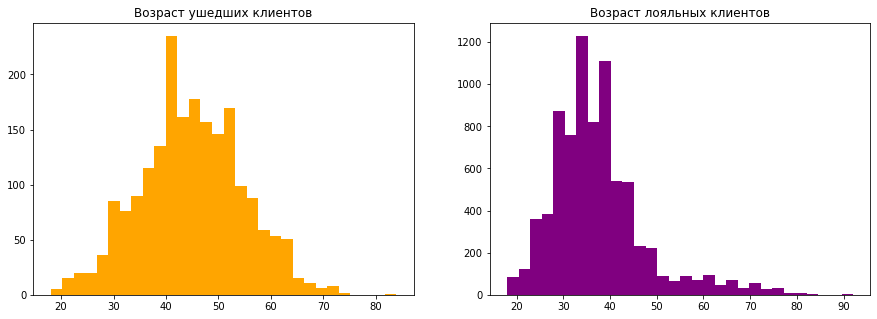

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # для визуализации распределения выберем гистограмму
axes[0].hist(
    x= age1, label=["Распределение ушедших клиентов по возрасту"], color="orange", bins=30
);
axes[0].set_title("Возраст ушедших клиентов");

axes[1].hist(
    x=age0, label=["Распределение лояльных клиентов по возрасту"], color="purple", bins=30
);
axes[1].set_title("Возраст лояльных клиентов");


Из распределения по возрасту лояльных клиентов видно отчетливое смещение графика влево, что означает удовлетвореннось качеством оказания услуг преимущественно среди молодых людей от 25 до 45 лет. В то же время, распределение ушедших клиентов по возрасту близко к нормальному и выраженных сдвигов не имеет. Пиковые значения возраста ушедших клиентов приходятся на 40-55 лет. Учитывая отток более зрелых клиентов, можно предположить, что их могут не устраивать продукты банка, нацеленные эту возрастную катугорию, и/или избыточная цифровизация банка, неудобство дистанционного взаимодействия со счетом. Стоит учитывать приверженность к консерватизму людей старшего возраста, что может объяснять нежелание осваивать новые цифровые продукты.

## 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [12]:
salary_qcut = pd.qcut(round(churn['EstimatedSalary']), q=20) # разделим диапазон предполагаемых зарплат на 20 групп
credit_salary = churn.pivot_table(values = 'CreditScore', index = 'Exited' , columns = salary_qcut) # построим сводную таблицу
                                                        # показывающую распределение значений кредитного рейтинга по уровню 
                                                        # предполагаемых зарплат и по признаку лояльности

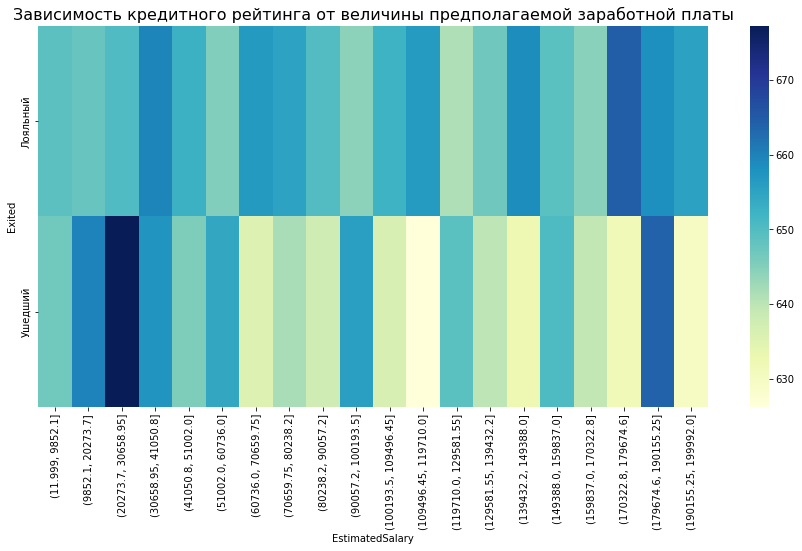

In [13]:
fig = plt.figure(figsize=(15, 7))  # выберем тепловую карту в качестве иллюстрации распределения кредитного рейтинга
heatmap = sns.heatmap(data=credit_salary, cmap='YlGnBu')
heatmap.set_title('Зависимость кредитного рейтинга от величины предполагаемой заработной платы', fontsize=16);

По тепловой карте ушедших клиентов видно, что в среднем кредитный рейтинг среди них не является низким и распределен более равномерно, чем среди лояльных потребителей. Можно предположить, что причиной ухода из банка не является неоплаченный в этом банке кредит. Во второй группе высокий кредитный рейтинг в большей степени зависит от предполагаемой заработной платы и сосредоточен в промежутках 10-40 тысяч доларов и 180-190 тысяч доларов. Можно предположить, что клиенты с более низким, но достаточным для нормальной жизни доходом, более ответственно относятся к выплате кредитов. 

## 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [14]:
gender_sort = churn.groupby('Gender')['Exited'].value_counts() # сгруппируем клиентов по полу и лояльности банку

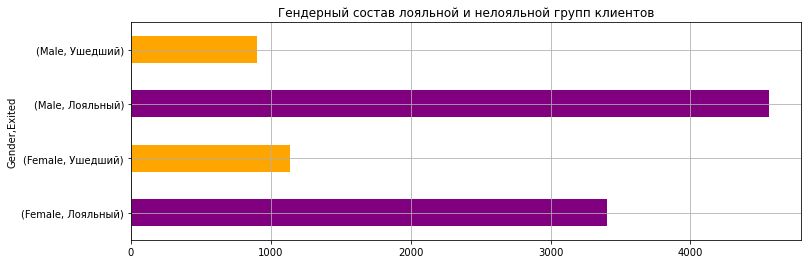

In [15]:
gender_sort.plot(   # используем для визуализации значений нескольких признаков столбчатую диаграмму
    kind='barh', 
    grid=True, 
    figsize=(12, 4), 
    color = ['purple', 'orange'],
    title = 'Гендерный состав лояльной и нелояльной групп клиентов'
);

По диаграмме видно, что и мужчины, и женщины часто прекращают пользоваться услугами банка, однако женщин в этой группе незначительно больше. В группе лояльных клиентов можно увидеть противоположную картину, там доля мужчин выше доли женщин почти на 1000.

## 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [16]:
products = churn.groupby('Exited')['NumOfProducts'].value_counts() # сгруппируем клиентов банка по признаку лояльности и 
                                                                   # количетсву приобретенных продуктов

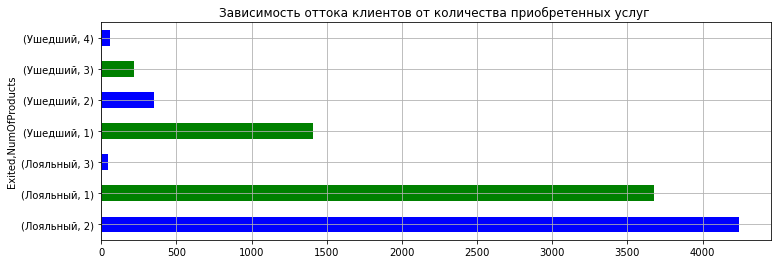

In [17]:
products.plot( 
    kind='barh', 
    grid=True, 
    figsize=(12, 4), 
    color = ['blue', 'green'],
    title = 'Зависимость оттока клиентов от количества приобретенных услуг '
);

Из данной диаграммы видно, что после приобретения 1 или 2 услуг большая часть потребителей остается лояльной. В то же время большинство ушедших клиентов пользовалось только одной услугой, это позволяет предположить, что с одной стороны банк может направить усилия на изменение политики в отношении новых клиентов, с дргуой стороны, часть лояльных клиентов, купивших только 1 услугу, находится в зоне риска и может покинуть банк.

## 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [18]:
activity = churn[['Exited', 'IsActiveMember']].value_counts() # сортируем данные из столбцов Exited и IsActiveMember

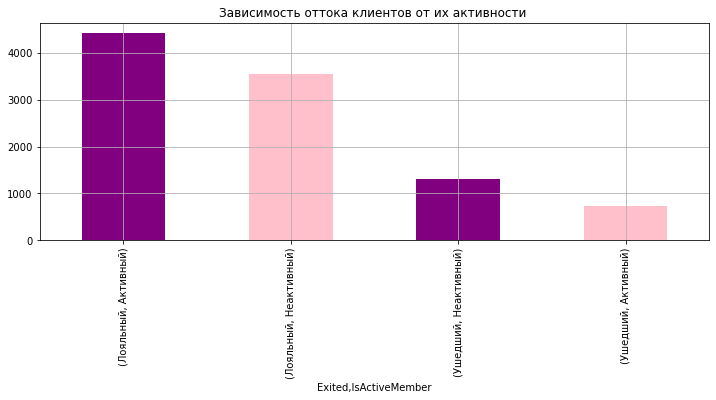

In [19]:
activity.plot( 
    kind='bar',             # используем для визуализации нескольких признаков многоуровневую столбчатую диаграмму
    grid=True, 
    figsize=(12, 4), 
    color = ['purple', 'pink'],
    title = 'Зависимость оттока клиентов от их активности '
);

На диаграмме можно увидеть, что больше половины ушедших клиентов были неактивными, а среди лояльных клиентов банка большую часть составляют активные потребители. Результаты этой диаграммы коррелируют с предыдущей, если клиент приобрел больше услуг и чаще пользуется продуктами банку, уровень его лояльности повышается

## 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [20]:
geo = pd.DataFrame()
display(churn.groupby(churn['Exited']=='Ушедший')['Geography'].value_counts())
geo['country'] = ['Germany', 'France', 'Spain'] 
geo['count'] = [814, 810, 413]    # создадим DataFrame geo, включающий в себя столбец из уникальных значений churn.Geography 
                                     # и столбец с количеством ушедших клиентов для каждой из стран
geo

Exited  Geography
False   France       4204
        Spain        2064
        Germany      1695
True    Germany       814
        France        810
        Spain         413
Name: Geography, dtype: int64

,country,count
0,Germany,814
1,France,810
2,Spain,413


In [22]:
fig = px.choropleth(
    data_frame=geo, 
    locations="country",
    locationmode = "country names", 
    color='count', 
    range_color=[0,820], 
    title='Отток клиентов по странам', 
    width=1000,
    height=700, 
    color_continuous_scale='Greens' 
)


fig.show()

На карте видно, что среди стран, на территории которых работает банк, лидерами по оттоку клиентов являются Франция и Германия. Отток клиентов в этих странах почти в 2 раза превышает отток клиентов в Испании. Можно предположить, что банк не учитывает менталитет и экономические особенности стран, либо на территории Франции и Германии находится сильный конкурент.

## 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [70]:
def get_credit_score_cat(credit_score):               # функция, позволяющия разделить значения кредитного рейтинга, на 7 групп
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [71]:
churn['CreditScoreCat'] = churn.CreditScore.apply(get_credit_score_cat) # применяем функцию к столбцу CreditScore и 
                                                                        # создаем в таблице новый столбец CreditScoreCat

churn['Exited'] = churn['Exited'].apply(lambda x:1 if x == 'Ушедший' else 0) 
#возвращаем числовой праметр столбцу Exited: 1 = ушедший, 0 = лояльный 

## Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [72]:
credit_tenur = churn.pivot_table(         # создаем сводную таблицу, значения таблицы отражают долю лояльных потребителей, 
values = 'Exited',                         # соответсвенно, чем меньше число, тем меньше в категории лояльных клиентов
index = 'CreditScoreCat',
columns = 'Tenure',
aggfunc = 'mean')

display(credit_tenur)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


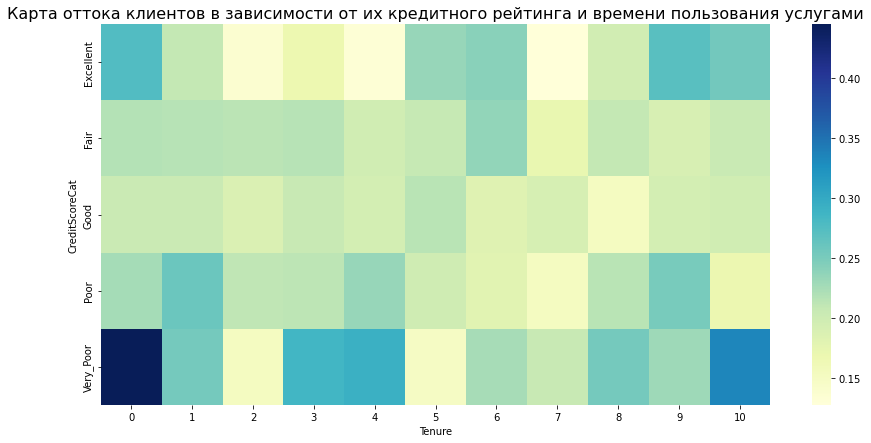

In [73]:
fig = plt.figure(figsize=(15, 7))    # построим тепловую карту, чтобы увидеть из каких категорий клиенты чаще покидают банк.
heatmap = sns.heatmap(data=credit_tenur, cmap='YlGnBu')
heatmap.set_title('Карта оттока клиентов в зависимости от их кредитного рейтинга и времени пользования услугами', fontsize=16);

Из представленных на тепловой карте данных видно, что чаще всего уходят клиенты, меньше или дольше всего пользующиеся услугами банка, и относящиеся к противоположным группам кредитного рейтинга: very poor, excellent. Преимущественно услугами банка остаются пользоваться клиенты в группе со средним кредитным рейтингом, пользующиеся услугами больше 1 года и менее 10 лет. Также можно предположить, что с течением времени, среди клиентов увеличивается лояльность к банку. 